### Plot the Dunkerton and Delisi QBO amplitude for the 140km top simulations

### Daily TEM diags computed at ./DATA_SORT/TEMdiags/day/ and then combined into monthly averages at ./DATA_SORT/TEMdiags/mon/

In [3]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from math import nan

from CASutils import averaging_utils as avg
from CASutils import qbo_utils as qbo
from CASutils import plotposition_utils as plotpos
from CASutils import readdata_utils as read
from CASutils import colorbar_utils as cbars
from CASutils import filter_utils as filt
from CASutils import plothisto_utils as histo

import sys

In [4]:
plotpath="/project/cas/islas/python_plots/CAM7_vertres_paper/FIGURES/"

## Dunkerton and Delisi QBO amplitude

In [6]:
# Read in the TEM diagnostics
dz1000_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz1000_140km.nc")
dz900_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz900_140km.nc")
dz800_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz800_140km.nc")
dz700_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz700_140km.nc")
dz600_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz600_140km.nc")
dz500_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz500_140km.nc")
dz400_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/dz400_140km.nc")
era5_tem = xr.open_dataset("/project/cas/islas/python_savs/CAM7_vertres_paper/DATA_SORT/TEMdiags/mon/ERA5.nc")

jra55_uzm = xr.open_mfdataset("/project/cas/islas/python_savs/CAM7_vertres_paper/RAW_DATA/JRA55/Uzm/Uzm*.nc")
monstr = xr.DataArray(jra55_uzm.indexes['time'].strftime('%Y%m'), coords=jra55_uzm.time.coords, name='monstr')
time = jra55_uzm.time.groupby(monstr).mean('time')
jra55_uzm = jra55_uzm.groupby(monstr).mean('time')
jra55_uzm = jra55_uzm.rename({'monstr':'time'})
jra55_uzm['time'] = time.values
#jra55_uzm = jra55_uzm.drop_vars('monstr')

merra2_uzm = xr.open_mfdataset("/project/cas/islas/python_savs/CAM7_vertres_paper/RAW_DATA/MERRA2/Uzm/Uzm*.nc")
monstr = xr.DataArray(merra2_uzm.indexes['time'].strftime('%Y%m'), coords=merra2_uzm.time.coords, name='monstr')
time = merra2_uzm.time.groupby(monstr).mean('time')
merra2_uzm = merra2_uzm.groupby(monstr).mean('time')
merra2_uzm = merra2_uzm.rename({'monstr':'time'})
merra2_uzm['time'] = time.values
#merra2_uzm = merra2_uzm.drop_vars('monstr')

dz1000_tem = dz1000_tem.isel(time=slice(12,dz1000_tem.time.size))
dz900_tem = dz900_tem.isel(time=slice(12,dz900_tem.time.size))
dz800_tem = dz800_tem.isel(time=slice(12,dz800_tem.time.size))
dz700_tem = dz700_tem.isel(time=slice(12,dz700_tem.time.size))
dz600_tem = dz600_tem.isel(time=slice(12,dz600_tem.time.size))
dz500_tem = dz500_tem.isel(time=slice(12,dz500_tem.time.size))
dz400_tem = dz400_tem.isel(time=slice(12,dz400_tem.time.size))
era5_tem = era5_tem.isel(time=slice(12,era5_tem.time.size))
merra2_uzm = merra2_uzm.isel(time=slice(12, merra2_uzm.time.size))
jra55_uzm = jra55_uzm.isel(time=slice(12, jra55_uzm.time.size))

### Sort some issues with 1987 missing in dz1000
dz1000_tem = dz1000_tem.sel(time=slice("1988-01-01","2005-12-31"))

# convert the pressure axis of era5 into hPa
era5_tem['plev'] = era5_tem.plev/100.

# Calculate the tropical average
dz1000_tem_tr = avg.cosweightlat(dz1000_tem.uzm,-5,5)
dz900_tem_tr = avg.cosweightlat(dz900_tem.uzm,-5,5)
dz800_tem_tr = avg.cosweightlat(dz800_tem.uzm,-5,5)
dz700_tem_tr = avg.cosweightlat(dz700_tem.uzm,-5,5)
dz600_tem_tr = avg.cosweightlat(dz600_tem.uzm,-5,5)
dz500_tem_tr = avg.cosweightlat(dz500_tem.uzm,-5,5)
dz400_tem_tr = avg.cosweightlat(dz400_tem.uzm,-5,5)
era5_tem_tr = avg.cosweightlat(era5_tem.uzm,-5,5)
jra55_uzm_tr = avg.cosweightlat(jra55_uzm.Uzm, -5, 5)
merra2_uzm_tr = avg.cosweightlat(merra2_uzm.Uzm, -5, 5)

# Deseasonalize
dz1000_tem_tr_deseas = dz1000_tem_tr.groupby('time.month') - dz1000_tem_tr.groupby('time.month').mean('time')
dz900_tem_tr_deseas = dz900_tem_tr.groupby('time.month') - dz900_tem_tr.groupby('time.month').mean('time')
dz800_tem_tr_deseas = dz800_tem_tr.groupby('time.month') - dz800_tem_tr.groupby('time.month').mean('time')
dz700_tem_tr_deseas = dz700_tem_tr.groupby('time.month') - dz700_tem_tr.groupby('time.month').mean('time')
dz600_tem_tr_deseas = dz600_tem_tr.groupby('time.month') - dz600_tem_tr.groupby('time.month').mean('time')
dz500_tem_tr_deseas = dz500_tem_tr.groupby('time.month') - dz500_tem_tr.groupby('time.month').mean('time')
dz400_tem_tr_deseas = dz400_tem_tr.groupby('time.month') - dz400_tem_tr.groupby('time.month').mean('time')
era5_tem_tr_deseas = era5_tem_tr.groupby('time.month') - era5_tem_tr.groupby('time.month').mean('time')
jra55_uzm_tr_deseas = jra55_uzm_tr.groupby('time.month') - jra55_uzm_tr.groupby('time.month').mean('time')
merra2_uzm_tr_deseas = merra2_uzm_tr.groupby('time.month') - merra2_uzm_tr.groupby('time.month').mean('time')

# Calculate the amplitude
dd_dz1000 = np.sqrt(2)*dz1000_tem_tr_deseas.std('time')
dd_dz900 = np.sqrt(2)*dz900_tem_tr_deseas.std('time')
dd_dz800 = np.sqrt(2)*dz800_tem_tr_deseas.std('time')
dd_dz700 = np.sqrt(2)*dz700_tem_tr_deseas.std('time')
dd_dz600 = np.sqrt(2)*dz600_tem_tr_deseas.std('time')
dd_dz500 = np.sqrt(2)*dz500_tem_tr_deseas.std('time')
dd_dz400 = np.sqrt(2)*dz400_tem_tr_deseas.std('time')
dd_era5 = np.sqrt(2)*era5_tem_tr_deseas.std('time')
dd_jra55 = np.sqrt(2)*jra55_uzm_tr_deseas.std('time').load()
dd_merra2 = np.sqrt(2)*merra2_uzm_tr_deseas.std('time').load()

DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat
DataArrayWeighted with weights along dimensions: lat


In [7]:
dd_jra55 = dd_jra55.load()
dd_merra2 = dd_merra2.load()

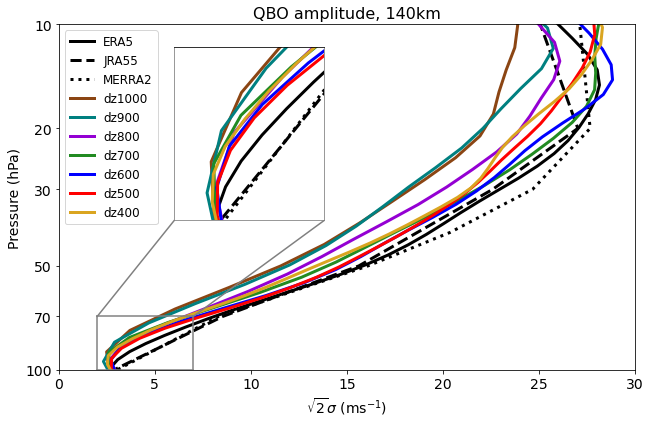

In [12]:
fig = plt.figure(figsize=(16,16))

#---Dunkerton and Delisi amplitude
ax = fig.add_axes([0.0,0.7,0.5,0.3])
ax.set_ylim(-np.log10(100),-np.log10(10))
ax.set_yticks([-np.log10(100),-np.log10(70),-np.log10(50),-np.log10(30),-np.log10(20),-np.log10(10)])
ax.set_yticklabels(['100','70','50','30','20','10'], fontsize=14)
ax.set_ylabel('Pressure (hPa)', fontsize=14)
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels(['0','5','10','15','20','25','30'], fontsize=14)
ax.set_xlabel('$\sqrt{2}\sigma$ (ms$^{-1}$)', fontsize=14)
ax.set_title('QBO amplitude, 140km', fontsize=16)
ax.set_xlim(0,30)

ax.plot(dd_era5, -np.log10(dd_era5.plev), color='black', linewidth=3, label='ERA5')
ax.plot(dd_jra55, -np.log10(dd_jra55.pre), color='black', linewidth=3, linestyle='dashed', label='JRA55')
ax.plot(dd_merra2, -np.log10(dd_merra2.lev), color='black', linewidth=3, linestyle='dotted', label='MERRA2')
ax.plot(dd_dz1000, -np.log10(dd_dz1000.ilev), color='saddlebrown', linewidth=3, label='dz1000')
ax.plot(dd_dz900, -np.log10(dd_dz900.ilev), color='teal', linewidth=3, label='dz900')
ax.plot(dd_dz800, -np.log10(dd_dz800.ilev), color='darkviolet', linewidth=3, label='dz800')
ax.plot(dd_dz700, -np.log10(dd_dz700.ilev), color='forestgreen', linewidth=3, label='dz700')
ax.plot(dd_dz600, -np.log10(dd_dz600.ilev), color='blue', linewidth=3, label='dz600')
ax.plot(dd_dz500, -np.log10(dd_dz500.ilev), color='red', linewidth=3, label='dz500')
ax.plot(dd_dz400, -np.log10(dd_dz400.ilev), color='goldenrod', linewidth=3, label='dz400')

ax.plot([2,7],[-np.log10(100),-np.log10(100)], color='gray')
ax.plot([2,7],[-np.log10(70),-np.log10(70)], color='gray')
ax.plot([2,2],[-np.log10(100),-np.log10(70)], color='gray')
ax.plot([7,7],[-np.log10(100),-np.log10(70)], color='gray')

ax.plot([2,6],[-np.log10(70),-np.log10(37)], color='gray')
ax.plot([7,13.8],[-np.log10(70),-np.log10(37)], color='gray')

ax.legend(fontsize=12)

ax = fig.add_axes([0.1,0.83,0.13,0.15])
ax.set_ylim(-np.log10(100),-np.log10(70))
ax.set_xlim(1.,7)
ax.set_yticks([-np.log10(100),-np.log10(90),-np.log10(80),-np.log10(70)])
ax.set_yticklabels(['100','90','80','70'])
ax.spines['bottom'].set_color('gray')
ax.spines['top'].set_color=('gray')
ax.spines['left'].set_color('gray')
ax.spines['right'].set_color('gray')
ax.set_xticks([])
ax.set_yticks([])

ax.plot(dd_era5, -np.log10(dd_era5.plev), color='black', linewidth=3, label='ERA5')
ax.plot(dd_jra55, -np.log10(dd_jra55.pre), color='black', linewidth=3, linestyle='dashed', label='JRA55')
ax.plot(dd_merra2, -np.log10(dd_merra2.lev), color='black', linewidth=3, linestyle='dotted', label='MERRA2')
ax.plot(dd_dz1000, -np.log10(dd_dz1000.ilev), color='saddlebrown', linewidth=3, label='dz1000')
ax.plot(dd_dz900, -np.log10(dd_dz900.ilev), color='teal', linewidth=3, label='dz900')
ax.plot(dd_dz800, -np.log10(dd_dz800.ilev), color='darkviolet', linewidth=3, label='dz800')
ax.plot(dd_dz700, -np.log10(dd_dz700.ilev), color='forestgreen', linewidth=3, label='dz700')
ax.plot(dd_dz600, -np.log10(dd_dz600.ilev), color='blue', linewidth=3, label='dz600')
ax.plot(dd_dz500, -np.log10(dd_dz500.ilev), color='red', linewidth=3, label='dz500')
ax.plot(dd_dz400, -np.log10(dd_dz400.ilev), color='goldenrod', linewidth=3, label='dz400')



fig.savefig(plotpath+'fig3.pdf', bbox_inches='tight', facecolor='white')